## Zadanie 1 (5b)

V tomto zadaní budete pracovať s datasetom Heart Failure Clinical Records, ktorý obsahuje záznamy pacientov so zlyhaním srdca, zozbierané počas obdobia ich sledovania.

Dataset je dostupný online: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records

Na stránke nájdete aj doplňujúce informácie o premenných, ktoré dataset obsahuje. (Odporúčam prečítať :) )

**Body dostanete za odpovede na zvýraznené otázky**


### Úloha 1 (1b)

Načítajte dataset do premennej `data_hf`.

In [9]:
import pandas as pd
data_hf = pd.read_csv("heart_failure_clinical_records_dataset.csv")
data_hf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


   **Obsahuje dataset chýbajúce hodnoty (NA) ?**

In [4]:
print(data_hf.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


**Aký typ majú vybrané premenné v datasete ? (numerické/kategorické)** (Ak by ste si pri niektorých premenných neboli istí, zdôvodnite svoju odpoveď.)

- age
- anaemia 
- high_blood_pressure
- serum_sodium
- death_event

In [7]:
columns = ["age","anaemia","high_blood_pressure","serum_sodium","DEATH_EVENT"]
print(data_hf[columns].dtypes)

age                    float64
anaemia                  int64
high_blood_pressure      int64
serum_sodium             int64
DEATH_EVENT              int64
dtype: object


**Obsahuje dataset duplicitné záznamy?**

In [11]:
print(data_hf.duplicated().sum())

0


### Úloha 2 (1b)

Skúmajte premennú pohlavie ('sex'). Premenná je kódovaná hodnotami 0 a 1. ( 0 = žena, 1 = muž)

In [12]:
data_hf["sex"]

0      1
1      1
2      1
3      1
4      0
      ..
294    1
295    0
296    0
297    1
298    1
Name: sex, Length: 299, dtype: int64

**Koľko záznamov mužov a žien obsahuje dataset?**

In [15]:
print("Pocet muzov: ", (data_hf["sex"] == 1).sum())
print("Pocet zien: ", (data_hf["sex"] == 0).sum())

Pocet muzov:  194
Pocet zien:  105


**Koľko mužov a žien je nefajčiarov ? (0 = nefajčiar, 1 = fajčiar)**

In [18]:
print("Pocet muzov nefajciarov: ", ((data_hf["sex"] == 1) & (data_hf["smoking"] == 0)).sum())
print("Pocet zien nefajciarov: ", ((data_hf["sex"] == 0) & (data_hf["smoking"] == 0)).sum())

Pocet muzov nefajciarov:  102
Pocet zien nefajciarov:  101


### Úloha 3 (1b)

Popíšte premennú vek ('age').

In [19]:
print(data_hf["age"].describe())

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64


**Aký je minimálny, maximálny a priemerný vek pacientov v datasete?**

In [23]:
print("Min ", data_hf["age"].min())
print("Max ", data_hf["age"].max())
print("Mean ", data_hf["age"].mean())

Min  40.0
Max  95.0
Mean  60.83389297658862


**Z akého veku je v datasete najviac záznamov?**

In [29]:
#data_hf["age"].value_counts().head(1)

most_common_age = data_hf["age"].value_counts().idxmax()
print(most_common_age)

60.0


### Úloha 4 (1b)

Pridajte do datasetu novú premennú s názvom `risk`, ktorá bude predstavovať riziko úmrtia pacienta po zlyhaní srdca. Táto premenná bude kategorická a bude obsahovať hodnoty 'Low' a 'High'. 
Premennú vytvorte na základe if-else rozhodovania podľa premenných 'age' a 'serum_creatinine':

- Ak je vek pacienta väčší ako 50 a zároveň level kreatinínu v krvnom sére ('serum_creatinine') je väčší ako 1.2 mg/dL, tak hodnota premennej 'Risk' je 'High'.
- V opačnom prípade je hodnota 'Low'

Hint: môžete použiť metódu `apply` na vytvorenie novej premennej, v ktorej použijete lambda funkciu na definovanie podmienok.

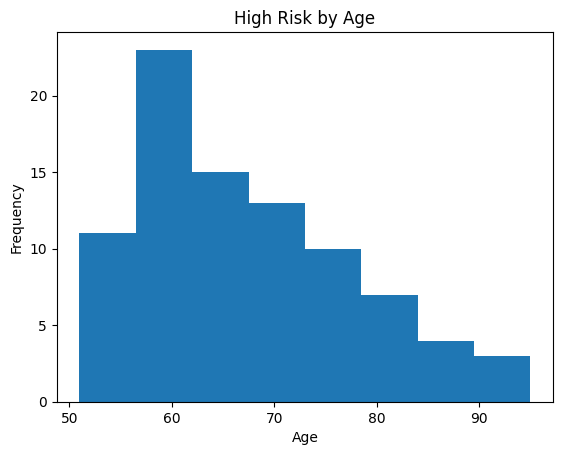

In [30]:
import matplotlib.pyplot as plt
# Add the 'risk' variable
data_hf['risk'] = data_hf.apply(lambda row: 'High' if row['age'] > 50 and row['serum_creatinine'] > 1.2 else 'Low', axis=1)

# Visualize high risk by age


high_risk = data_hf[data_hf['risk'] == 'High']
plt.hist(high_risk['age'], bins='auto')
plt.title('High Risk by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Vizualizujte vysoké riziko úmrtia pre jednotlivé vekové skupiny histogramom:

Hint: Použite metódu `hist` z knižnice `matplotlib.pyplot` na vizualizáciu distribúcie veku pre pacientov s vysokým rizikom úmrtia.

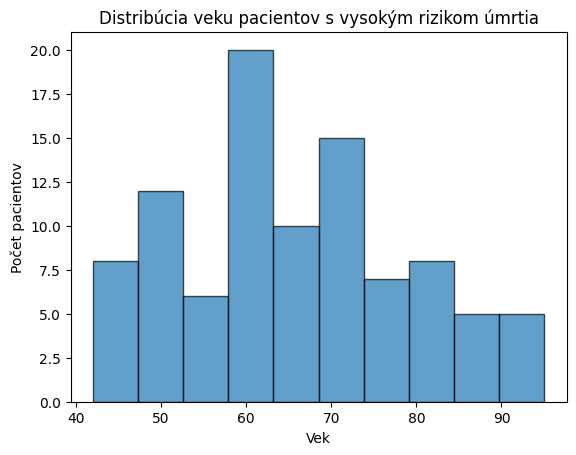

In [32]:
import matplotlib.pyplot as plt

# Filtrovanie pacientov s vysokým rizikom úmrtia (death_event = 1)
high_risk_patients = data_hf[data_hf["DEATH_EVENT"] == 1]["age"]

# Vykreslenie histogramu
plt.hist(high_risk_patients, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel("Vek")
plt.ylabel("Počet pacientov")
plt.title("Distribúcia veku pacientov s vysokým rizikom úmrtia")
plt.show()

**V akom veku je riziko zlyhania srdca najväčšie?**

In [34]:
highest_risk_age = data_hf[data_hf["DEATH_EVENT"] == 1]["age"].value_counts().idxmax()
print("Vek s najväčším rizikom zlyhania srdca:", highest_risk_age)

Vek s najväčším rizikom zlyhania srdca: 60.0


**Koľko záznamov (približne) je v datasete v tejto vekovej kategórii?**

In [46]:
data_hf[data_hf["age"] == 60].shape[0]

33

### Úloha 5 (1b)

Analyzujte koreláciu medzi všetkými atribútmi tohto datasetu (napr. vytvorením correlation plot)

Hint: Nenumerické atribúty môžete pred vytvorením korelačnej matice odstrániť.


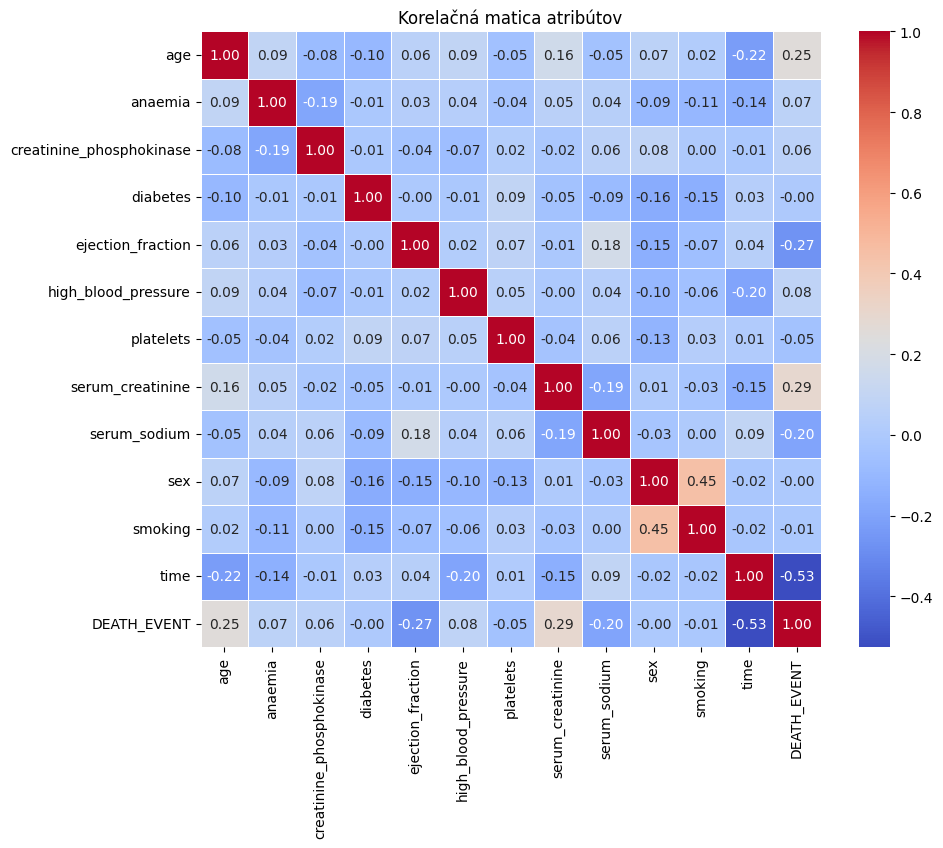

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Odstrániť nenumerické stĺpce
data_numeric = data_hf.select_dtypes(include=["number"])

# Vypočítať korelačnú maticu
correlation_matrix = data_numeric.corr()


# Vykresliť korelačnú maticu ako heatmapu
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelačná matica atribútov")
plt.show()


**Ktoré atribúty majú medzi sebou najväčšiu zápornú koreláciu?** (uveďte prvé dve dvojice)

In [50]:
# Vybrať dvojice s najnižšou koreláciou (najsilnejšia negatívna korelácia)
negative_correlation = correlation_matrix.unstack().sort_values().drop_duplicates()
print("Najväčšia záporná korelácia medzi atribútmi:")
print(negative_correlation.head(2))


Najväčšia záporná korelácia medzi atribútmi:
DEATH_EVENT        time          -0.526964
ejection_fraction  DEATH_EVENT   -0.268603
dtype: float64


**Ktoré atribúty majú medzi sebou najväčšiu kladnú koreláciu?** (uveďte prvú dvojicu)

In [51]:
# Vybrať dvojicu atribútov s najsilnejšou pozitívnou koreláciou
positive_correlation = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print("Najväčšia kladná korelácia medzi atribútmi:")
print(positive_correlation.head(1))


Najväčšia kladná korelácia medzi atribútmi:
age  age    1.0
dtype: float64


----

Viac informácií o zlyhaní srdca: https://www.nhlbi.nih.gov/health/heart-failure